# Creating Basic Visualization in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("schools_combined.csv")

C:\Users\Optiplex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,school_id,school_name,region,province,municipality,division,year_level,gender,enrollment,latitude,longitude,ID,Total_Enro,Total_Inst,Rooms_used,Rooms_unused,Type_of_Sc
0,0,300002,Bacarra NCHS,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,first year,male,299,18.24977222,120.61305,300002,1868,55,43.0,0.0,School with no Annexes
1,1,300002,Bacarra NCHS,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,first year,female,250,18.24977222,120.61305,300002,1868,55,43.0,0.0,School with no Annexes
2,2,300002,Bacarra NCHS,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,second year,male,246,18.24977222,120.61305,300002,1868,55,43.0,0.0,School with no Annexes
3,3,300002,Bacarra NCHS,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,second year,female,284,18.24977222,120.61305,300002,1868,55,43.0,0.0,School with no Annexes
4,4,300002,Bacarra NCHS,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,third year,male,220,18.24977222,120.61305,300002,1868,55,43.0,0.0,School with no Annexes


In [5]:
grade_level = df.groupby("year_level")["enrollment"].sum()
grade_level

year_level
first year     817414
fourth year    626902
grade 1        792898
grade 2        824246
grade 3        844424
grade 4        920665
grade 5        846376
grade 6        777489
second year    764328
third year     710006
Name: enrollment, dtype: int64

## A. Quick plot using pandas

The easiest way to create a graph is by simply adding `.plot` to the data you want to visualize. You can customize this further by adding arguments inside the parenthesis.

Here, we have a simple bar graph.

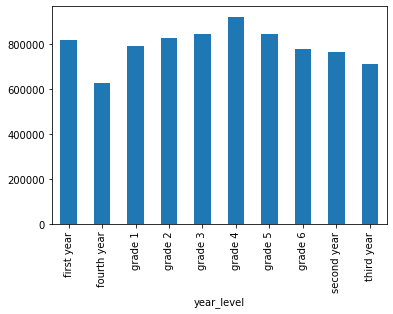

In [6]:
# Plotting using .plot
grade_level.plot(kind="bar")

## B. Plotting with Matplotlib

When using `.plot`, the features you can customize is limited. A better tool to be able to customize your graphs is by using **Matplotlib**. 

- **Matplotlib** is a python 2D plotting library built on the top of the basic Python language and Numpy.

Let's begin by discussing the parts of a graph.

<img src='https://matplotlib.org/3.3.3/_images/anatomy.png'>

### 1. Bar Graph

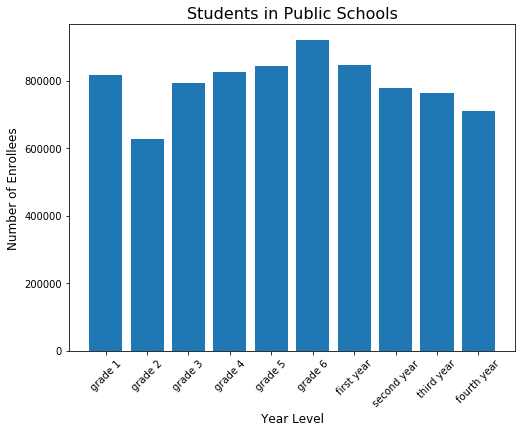

In [6]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(8,6)) 

# the main code to create the graph
plt.bar(grade_level.index, grade_level.values) 

# additional elements that can be customzed
plt.title("Students in Public Schools", fontsize=16)
plt.ylabel("Number of Enrollees", fontsize=12)
plt.xlabel("Year Level", fontsize=12)
year = ["grade 1","grade 2", "grade 3", "grade 4", "grade 5", "grade 6",
        "first year", "second year", "third year", "fourth year"]
plt.xticks(range(len(grade_level.index)), year, rotation=45)

# display graph
plt.show()

Unlike our first example, we can add more features to matplotlib. Here we added titles and axis labels to improve the graph. We also ordered the year level to be more logical.

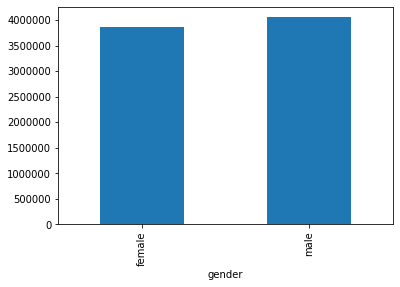

In [8]:
# Can you try making a bar graph of count of male and female students?
df.groupby("gender")["enrollment"].sum().plot(kind="bar")

### 2. Histograms

C:\Users\Optiplex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Optiplex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


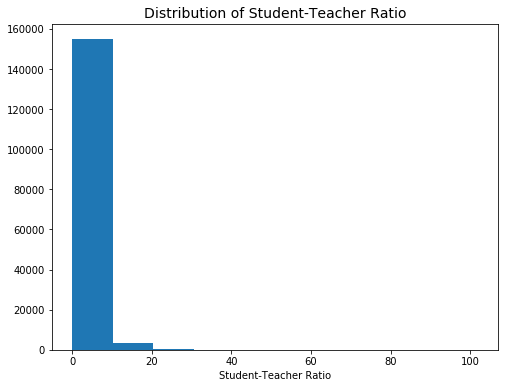

In [30]:
df["student_teacher"] = df["enrollment"]/df["Total_Inst"]
df = df.replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(8,6))
plt.hist(df["student_teacher"])
plt.title("Distribution of Student-Teacher Ratio", fontsize=14)
plt.xlabel("Student-Teacher Ratio")
plt.show()

(0, 150)

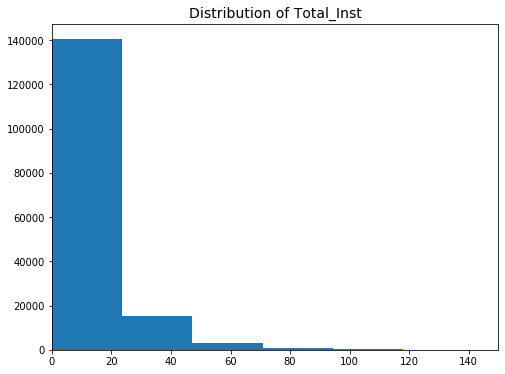

In [14]:
# Can you try making a histogtam of number of teachers?
plt.figure(figsize=(8,6))
plt.hist(df["Total_Inst"])
plt.title("Distribution of Total_Inst", fontsize=14)
plt.xlim(0,150)

### 3. Scatterplot

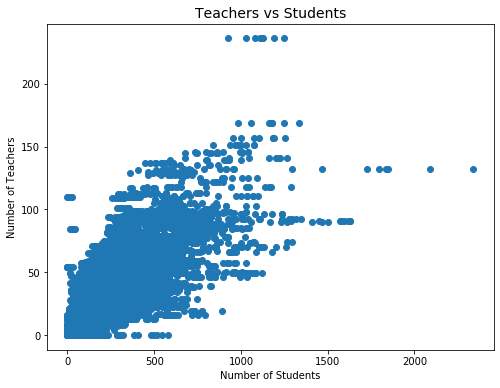

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df["enrollment"], df["Total_Inst"])
plt.title("Teachers vs Students", fontsize=14)
plt.ylabel("Number of Teachers")
plt.xlabel("Number of Students")
plt.show()

### 4. Pie Chart

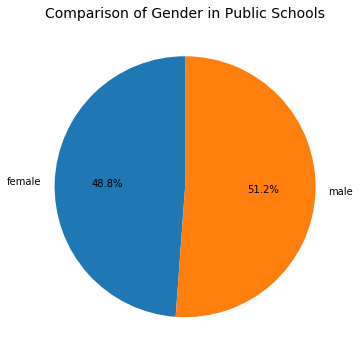

In [11]:
gender = df.groupby("gender")["enrollment"].sum()

plt.figure(figsize=(6,6))
plt.pie(gender, labels=["female","male"], autopct='%1.1f%%', startangle=90)
plt.title("Comparison of Gender in Public Schools", fontsize=14)
plt.show()


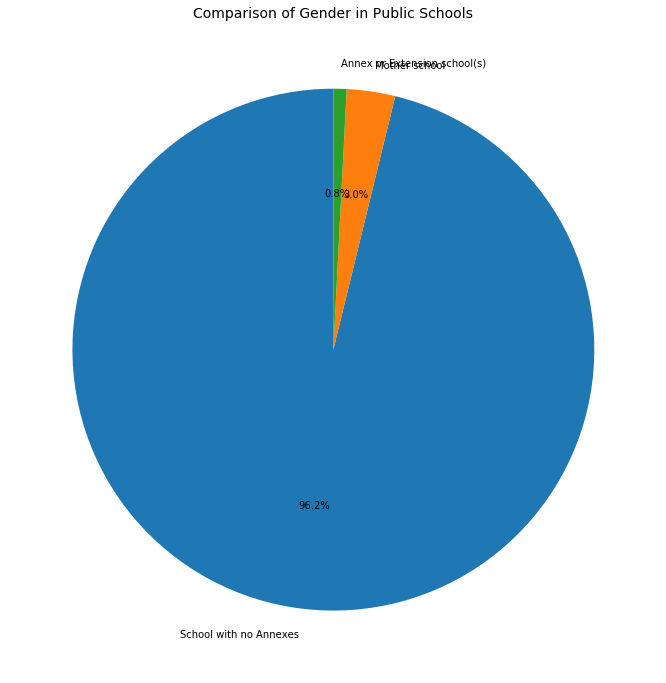

In [26]:
# Can you make a pie chart for type of school (Type_of_Sc)?
type_of_sc = df["Type_of_Sc"].value_counts()

plt.figure(figsize=(12,12))
plt.pie(type_of_sc, labels=type_of_sc.index, autopct='%1.1f%%', startangle=90)
plt.title("Comparison of Gender in Public Schools", fontsize=14)
plt.show()

### 5. Creating Multiple Subplots in One Figure

- To create multiple plots, you need to set the number of subplots and identify the the axes.

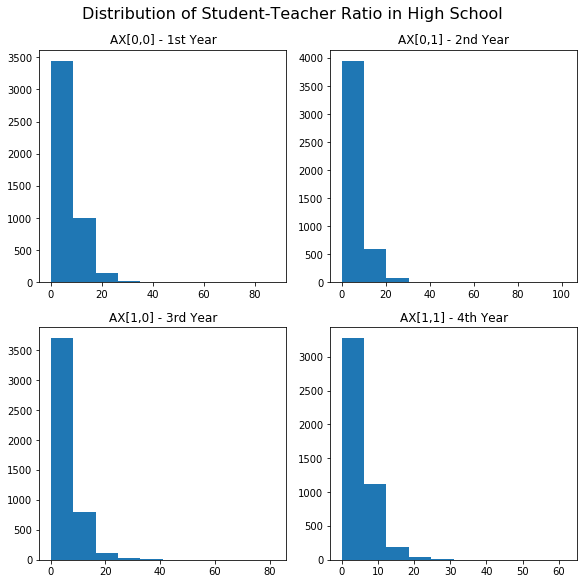

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

first_year = df[df["year_level"]=="first year"]
second_year = df[df["year_level"]=="second year"]
third_year = df[df["year_level"]=="third year"]
fourth_year = df[df["year_level"]=="fourth year"]

axes[0,0].hist(first_year["student_teacher"]) 
axes[0,0].set_title("AX[0,0] - 1st Year")
axes[0,1].hist(second_year["student_teacher"]) 
axes[0,1].set_title('AX[0,1] - 2nd Year')
axes[1,0].hist(third_year["student_teacher"]) 
axes[1,0].set_title('AX[1,0] - 3rd Year')
axes[1,1].hist(fourth_year["student_teacher"]) 
axes[1,1].set_title('AX[1,1] - 4th Year')

fig.suptitle('Distribution of Student-Teacher Ratio in High School', fontsize=16)
plt.show()